In [175]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [176]:
df = pd.read_csv('breast cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [177]:
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)
if missing_values.sum() == 0:
    print("No missing values found.")
else:
    print("Warning: Missing values detected. Consider handling them.")


Missing values in each column:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal

In [178]:
# Remove 'id' and 'Unnamed: 32' columns
df = df.drop(['id', 'Unnamed: 32'], axis=1)
print("\nRemoved 'id' and 'Unnamed: 32' columns.")


Removed 'id' and 'Unnamed: 32' columns.


In [179]:
# Encode 'diagnosis' column (M=1, B=0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
print("\n'diagnosis' column encoded (M=1, B=0).")
print("Value counts after encoding:")
print(df['diagnosis'].value_counts())


'diagnosis' column encoded (M=1, B=0).
Value counts after encoding:
diagnosis
0    357
1    212
Name: count, dtype: int64


In [180]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicate rows removed.")
    print(f"New shape of dataset: {df.shape}")
else:
    print("No duplicate rows found.")



Number of duplicate rows: 0
No duplicate rows found.


In [181]:
# Check for outliers using IQR method
print("\nChecking for outliers in numerical columns...")
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f"Column '{col}': {len(outliers)} outliers detected.")


Checking for outliers in numerical columns...
Column 'diagnosis': 0 outliers detected.
Column 'radius_mean': 14 outliers detected.
Column 'texture_mean': 7 outliers detected.
Column 'perimeter_mean': 13 outliers detected.
Column 'area_mean': 25 outliers detected.
Column 'smoothness_mean': 6 outliers detected.
Column 'compactness_mean': 16 outliers detected.
Column 'concavity_mean': 18 outliers detected.
Column 'concave points_mean': 10 outliers detected.
Column 'symmetry_mean': 15 outliers detected.
Column 'fractal_dimension_mean': 15 outliers detected.
Column 'radius_se': 38 outliers detected.
Column 'texture_se': 20 outliers detected.
Column 'perimeter_se': 38 outliers detected.
Column 'area_se': 65 outliers detected.
Column 'smoothness_se': 30 outliers detected.
Column 'compactness_se': 28 outliers detected.
Column 'concavity_se': 22 outliers detected.
Column 'concave points_se': 19 outliers detected.
Column 'symmetry_se': 27 outliers detected.
Column 'fractal_dimension_se': 28 out

In [182]:
print(f"Final shape of dataset: {df.shape}")
print("\nFirst few rows of cleaned dataset:")
print(df.head())

Final shape of dataset: (569, 31)

First few rows of cleaned dataset:
   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_w

In [183]:
# Separate features (X) and target (y)
X = df.drop('diagnosis', axis=1)  # All columns except 'diagnosis'
y = df['diagnosis']  # Target column

In [184]:
# First split: 60% train, 40% temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# Second split: 20% validation, 20% test (split temp 50/50)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

In [185]:
# Verify shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

# Check class distribution to ensure stratification
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))
print("Class distribution in validation set:")
print(y_val.value_counts(normalize=True))
print("Class distribution in test set:")
print(y_test.value_counts(normalize=True))

Training set shape: (341, 30) (341,)
Validation set shape: (114, 30) (114,)
Test set shape: (114, 30) (114,)

Class distribution in training set:
diagnosis
0    0.627566
1    0.372434
Name: proportion, dtype: float64
Class distribution in validation set:
diagnosis
0    0.622807
1    0.377193
Name: proportion, dtype: float64
Class distribution in test set:
diagnosis
0    0.631579
1    0.368421
Name: proportion, dtype: float64


In [186]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [187]:
# Tune K (number of neighbors)
k_values = range(1, 21)
val_accuracies = []

for k in k_values:
    # Initialize and train KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Predict on validation set
    y_val_pred = knn.predict(X_val_scaled)
    
    # Compute validation accuracy
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_accuracy)
    print(f"K={k}, Validation Accuracy: {val_accuracy:.4f}")

K=1, Validation Accuracy: 0.9561
K=2, Validation Accuracy: 0.9386
K=3, Validation Accuracy: 0.9561
K=4, Validation Accuracy: 0.9561
K=5, Validation Accuracy: 0.9561
K=6, Validation Accuracy: 0.9386
K=7, Validation Accuracy: 0.9474
K=8, Validation Accuracy: 0.9386
K=9, Validation Accuracy: 0.9386
K=10, Validation Accuracy: 0.9386
K=11, Validation Accuracy: 0.9474
K=12, Validation Accuracy: 0.9386
K=13, Validation Accuracy: 0.9386
K=14, Validation Accuracy: 0.9386
K=15, Validation Accuracy: 0.9474
K=16, Validation Accuracy: 0.9386
K=17, Validation Accuracy: 0.9386
K=18, Validation Accuracy: 0.9386
K=19, Validation Accuracy: 0.9474
K=20, Validation Accuracy: 0.9474


In [188]:
# Find best K
best_k = k_values[np.argmax(val_accuracies)]
best_accuracy = max(val_accuracies)
print(f"\nBest K: {best_k} with Validation Accuracy: {best_accuracy:.4f}")


Best K: 1 with Validation Accuracy: 0.9561


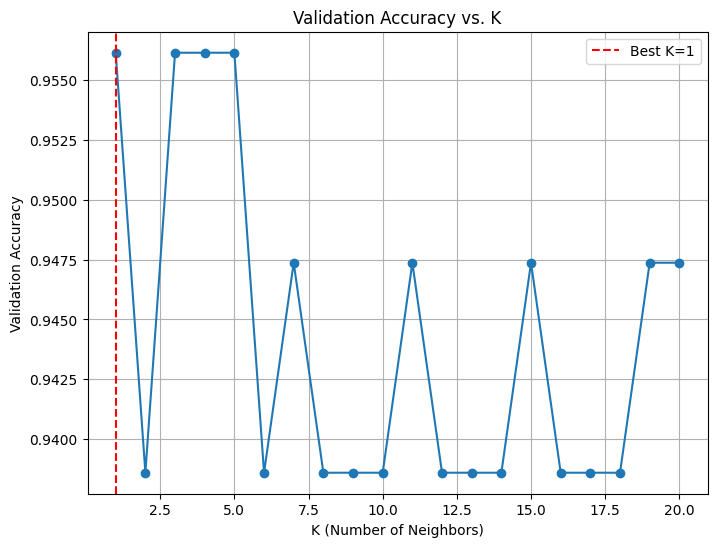

In [189]:
# Plot validation accuracy vs. K
plt.figure(figsize=(8, 6))
plt.plot(k_values, val_accuracies, marker='o')
plt.title('Validation Accuracy vs. K')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best K={best_k}')
plt.legend()
plt.savefig('knn_validation_accuracy.png')
plt.show()

In [190]:
# Train final model with best K on training data
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [191]:
# Create pipeline for cross-validation
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('knn', KNeighborsClassifier(n_neighbors=best_k))  # KNN with best K
])

In [192]:
# Perform 5-fold cross-validation on training set
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
cv_mean = np.mean(cv_scores)
cv_std = np.std(cv_scores)
print("\n5-Fold Cross-Validation Results (K={}):".format(best_k))
print("Accuracies per fold:", cv_scores.round(4))
print("Mean CV Accuracy: {:.4f}".format(cv_mean))
print("Standard Deviation: {:.4f}".format(cv_std))


5-Fold Cross-Validation Results (K=1):
Accuracies per fold: [0.971  0.9559 0.9559 0.9706 0.9412]
Mean CV Accuracy: 0.9589
Standard Deviation: 0.0111


In [193]:
# Train final model on full training set
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=1))])

In [194]:
# Evaluate on validation set (for comparison)
y_val_pred = pipeline.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("\nValidation Set Accuracy (K={}): {:.4f}".format(best_k, val_accuracy))


Validation Set Accuracy (K=1): 0.9561


In [195]:
# Evaluate on test set
y_test_pred = pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Set Accuracy (K={}): {:.4f}".format(best_k, test_accuracy))

Test Set Accuracy (K=1): 0.9211


In [196]:
# Compare results
print("\nPerformance Comparison:")
print("Mean CV Accuracy (Training): {:.4f} (±{:.4f})".format(cv_mean, cv_std))
print("Validation Accuracy: {:.4f}".format(val_accuracy))
print("Test Accuracy: {:.4f}".format(test_accuracy))


Performance Comparison:
Mean CV Accuracy (Training): 0.9589 (±0.0111)
Validation Accuracy: 0.9561
Test Accuracy: 0.9211


In [197]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix (Test Set, K={}):".format(best_k))
print(cm)


Confusion Matrix (Test Set, K=1):
[[68  4]
 [ 5 37]]


In [198]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

In [199]:
print("\nTest Set Metrics (K={}):".format(best_k))
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-Score: {:.4f}".format(f1))


Test Set Metrics (K=1):
Accuracy: 0.9211
Precision: 0.9024
Recall: 0.8810
F1-Score: 0.8916


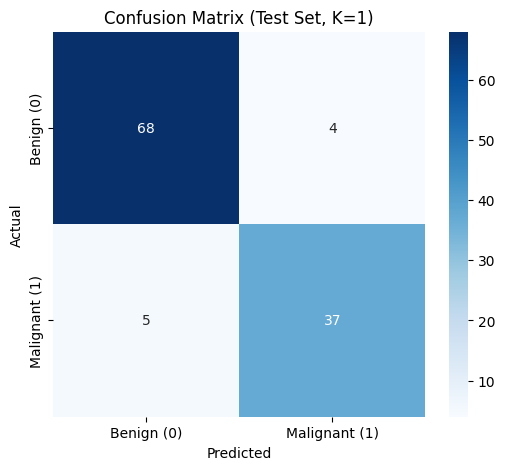

In [200]:
# Visualize confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign (0)', 'Malignant (1)'], 
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.title('Confusion Matrix (Test Set, K={})'.format(best_k))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')
plt.show()

In [201]:
# Check for overfitting with original K=1
pipeline_k1 = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=1))
])
pipeline_k1.fit(X_train, y_train)
train_acc_k1 = accuracy_score(y_train, pipeline_k1.predict(X_train))
val_acc_k1 = accuracy_score(y_val, pipeline_k1.predict(X_val))
test_acc_k1 = accuracy_score(y_test, pipeline_k1.predict(X_test))
print("\nOriginal Model (K=1) Accuracies:")
print("Training Accuracy: {:.4f}".format(train_acc_k1))
print("Validation Accuracy: {:.4f}".format(val_acc_k1))
print("Test Accuracy: {:.4f}".format(test_acc_k1))


Original Model (K=1) Accuracies:
Training Accuracy: 1.0000
Validation Accuracy: 0.9561
Test Accuracy: 0.9211


In [202]:
# Feature selection: Remove highly correlated features
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print("\nFeatures to drop (high correlation > 0.8):", to_drop)
X_train_selected = X_train.drop(to_drop, axis=1)
X_val_selected = X_val.drop(to_drop, axis=1)
X_test_selected = X_test.drop(to_drop, axis=1)
print("Selected features shape:", X_train_selected.shape)


Features to drop (high correlation > 0.8): ['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']
Selected features shape: (341, 16)


In [203]:
# Tune K using 5-fold cross-validation on selected features
k_values = range(1, 21)
cv_accuracies = []

for k in k_values:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    cv_scores = cross_val_score(pipeline, X_train_selected, y_train, cv=5, scoring='accuracy')
    cv_accuracies.append(np.mean(cv_scores))
    print(f"K={k}, Mean CV Accuracy: {cv_accuracies[-1]:.4f}")


K=1, Mean CV Accuracy: 0.9297
K=2, Mean CV Accuracy: 0.9208
K=3, Mean CV Accuracy: 0.9267
K=4, Mean CV Accuracy: 0.9326
K=5, Mean CV Accuracy: 0.9355
K=6, Mean CV Accuracy: 0.9472
K=7, Mean CV Accuracy: 0.9561
K=8, Mean CV Accuracy: 0.9384
K=9, Mean CV Accuracy: 0.9531
K=10, Mean CV Accuracy: 0.9443
K=11, Mean CV Accuracy: 0.9531
K=12, Mean CV Accuracy: 0.9502
K=13, Mean CV Accuracy: 0.9472
K=14, Mean CV Accuracy: 0.9443
K=15, Mean CV Accuracy: 0.9442
K=16, Mean CV Accuracy: 0.9326
K=17, Mean CV Accuracy: 0.9473
K=18, Mean CV Accuracy: 0.9355
K=19, Mean CV Accuracy: 0.9384
K=20, Mean CV Accuracy: 0.9267


In [204]:
# Get best K
best_k = k_values[np.argmax(cv_accuracies)]
best_cv_accuracy = max(cv_accuracies)
print(f"\nBest K (after feature selection): {best_k} with Mean CV Accuracy: {best_cv_accuracy:.4f}")


Best K (after feature selection): 7 with Mean CV Accuracy: 0.9561


In [205]:
# Train final model with best K and selected features
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=best_k))
])
final_pipeline.fit(X_train_selected, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=7))])

In [206]:
# Evaluate on test set
y_test_pred = final_pipeline.predict(X_test_selected)
cm = confusion_matrix(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("\nImproved Model (K={}, Selected Features):".format(best_k))
print("Confusion Matrix:")
print(cm)
print("Test Set Metrics:")
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-Score: {:.4f}".format(f1))


Improved Model (K=7, Selected Features):
Confusion Matrix:
[[69  3]
 [ 7 35]]
Test Set Metrics:
Accuracy: 0.9123
Precision: 0.9211
Recall: 0.8333
F1-Score: 0.8750


In [207]:
# Compare with original model
print("\nComparison with Original Model (K=1):")
print("Original Test Accuracy: {:.4f}".format(test_acc_k1))
print("Original Confusion Matrix:\n[[68  4]\n [ 5 37]]")
print("Improved Test Accuracy: {:.4f}".format(accuracy))
print("Improved Confusion Matrix:\n", cm)


Comparison with Original Model (K=1):
Original Test Accuracy: 0.9211
Original Confusion Matrix:
[[68  4]
 [ 5 37]]
Improved Test Accuracy: 0.9123
Improved Confusion Matrix:
 [[69  3]
 [ 7 35]]


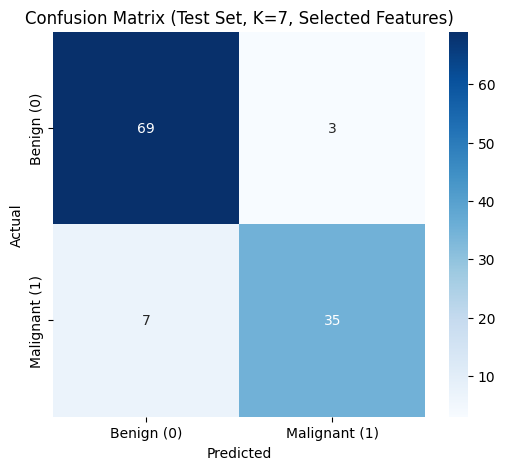

In [208]:
# Visualize improved confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign (0)', 'Malignant (1)'], 
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.title('Confusion Matrix (Test Set, K={}, Selected Features)'.format(best_k))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_improved.png')
plt.show()

In [209]:
# PCA for 2D scatter plot
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale all data for PCA
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)
explained_variance_2d = pca_2d.explained_variance_ratio_.sum()
print("\n2D PCA Explained Variance Ratio: {:.4f}".format(explained_variance_2d))



2D PCA Explained Variance Ratio: 0.6324


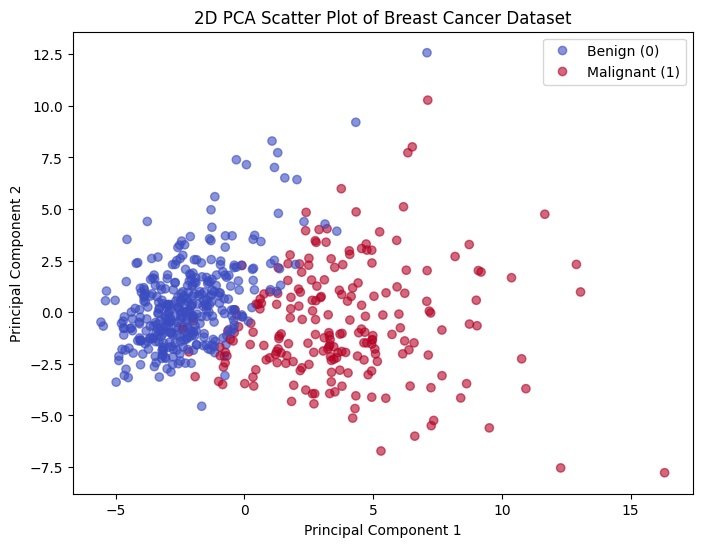

In [210]:
# 2D scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='coolwarm', 
                      alpha=0.6, label=['Benign', 'Malignant'])
plt.title('2D PCA Scatter Plot of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=['Benign (0)', 'Malignant (1)'])
plt.savefig('pca_2d_scatter.png')
plt.show()

In [211]:
# PCA for 3D scatter plot
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)
explained_variance_3d = pca_3d.explained_variance_ratio_.sum()
print("3D PCA Explained Variance Ratio: {:.4f}".format(explained_variance_3d))

3D PCA Explained Variance Ratio: 0.7264


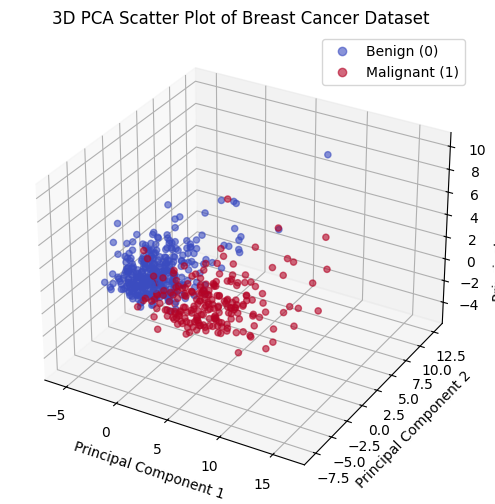

In [212]:
# 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], 
                     c=y, cmap='coolwarm', alpha=0.6)
ax.set_title('3D PCA Scatter Plot of Breast Cancer Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend(handles=scatter.legend_elements()[0], labels=['Benign (0)', 'Malignant (1)'])
plt.savefig('pca_3d_scatter.png')
plt.show()